In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt")
df.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [5]:
# Shape
df.shape

(645, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   645 non-null    int64  
 1   Sqft         645 non-null    float64
 2   Floor        645 non-null    int64  
 3   TotalFloor   645 non-null    int64  
 4   Bedroom      645 non-null    int64  
 5   Living.Room  645 non-null    int64  
 6   Bathroom     645 non-null    int64  
 7   Price        645 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 40.4 KB


In [8]:
df.describe()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,325.159690,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,187.312152,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,1.000000,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,164.000000,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,326.000000,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,487.000000,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,648.000000,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [9]:
# Data Cleaning
df.isnull().sum()

Unnamed: 0     0
Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

C:\Users\sanje_crlv28m\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sanje_crlv28m\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sanje_crlv28m\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without 

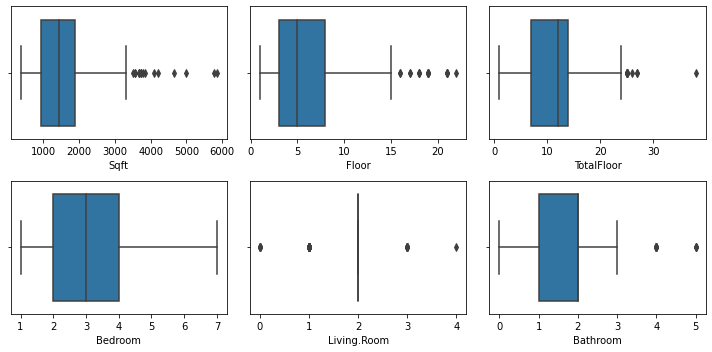

In [20]:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df['Sqft'], ax = axs[0,0])
plt2 = sns.boxplot(df['Floor'], ax = axs[0,1])
plt3 = sns.boxplot(df['TotalFloor'], ax = axs[0,2])
plt1 = sns.boxplot(df['Bedroom'], ax = axs[1,0])
plt2 = sns.boxplot(df['Living.Room'], ax = axs[1,1])
plt3 = sns.boxplot(df['Bathroom'], ax = axs[1,2])
plt.tight_layout()

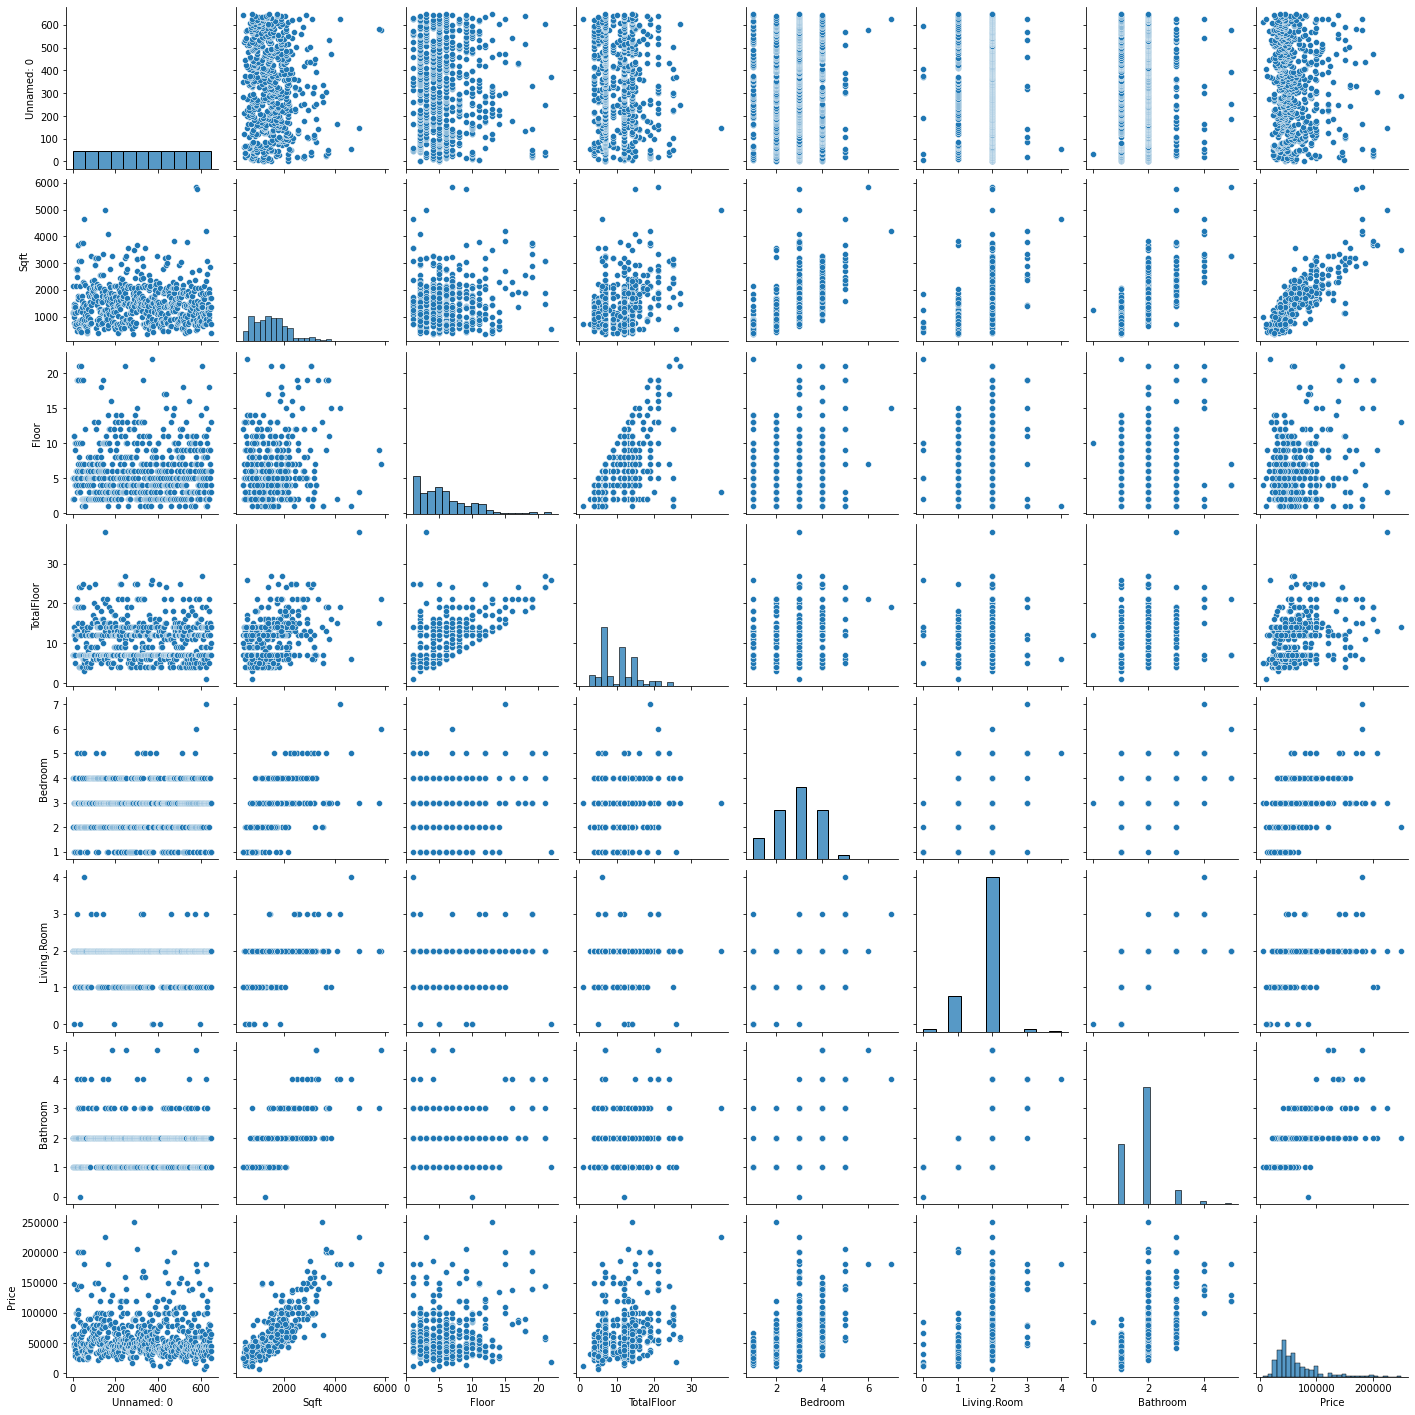

In [22]:
sns.pairplot(df)
plt.show()

In [23]:
df.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [25]:
#Splitting the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [27]:
#Apply scaler() to all the columns 
num_vars = ['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room','Bathroom','Price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [30]:
df_train.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
5,6,0.139806,0.50,0.297297,0.500000,0.666667,0.25,0.571429
244,247,0.335922,0.35,0.243243,0.333333,0.666667,0.50,0.453782
184,187,0.164401,0.20,0.162162,0.166667,0.333333,0.25,0.105042
44,45,0.256958,0.30,0.378378,0.500000,0.666667,0.25,0.243697
109,111,0.310032,0.30,0.378378,0.166667,0.666667,0.25,0.285714


In [31]:
df_train.describe()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000
mean,320.813747,0.210072,0.238581,0.263019,0.310052,0.605322,0.205654,0.206571
std,189.064753,0.137516,0.186301,0.133628,0.165961,0.145488,0.168246,0.145853
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,152.500000,0.110356,0.100000,0.162162,0.166667,0.666667,0.000000,0.113445
50%,318.000000,0.192880,0.200000,0.270270,0.333333,0.666667,0.250000,0.159660
75%,485.000000,0.278641,0.325000,0.351351,0.500000,0.666667,0.250000,0.264706
max,648.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


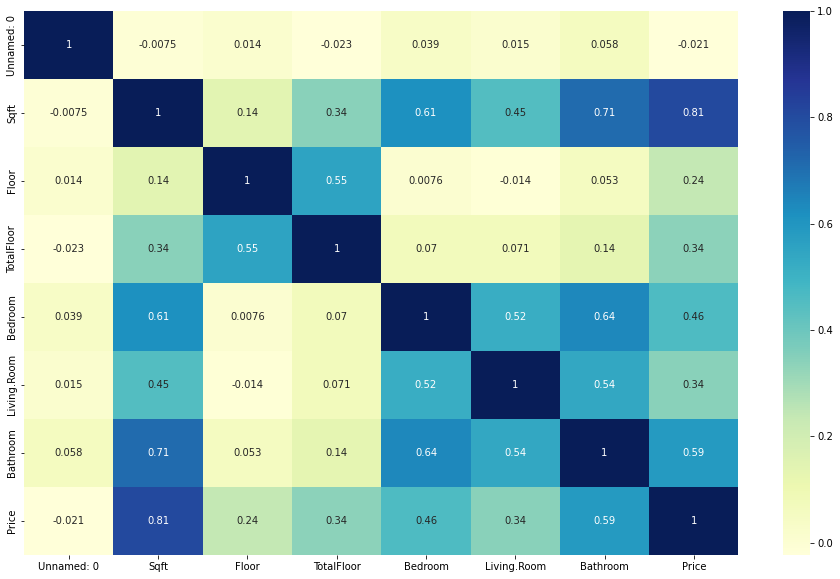

In [32]:
#Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [51]:
X = df.drop('Price', axis=1)
y = df['Price']

In [52]:
# Training and testing
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)

In [65]:
X_train

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom
24,25,3664.740,19,19,3,2,3
214,217,1366.272,4,11,3,2,2
314,318,1476.570,6,6,3,2,2
565,569,1544.172,10,12,4,2,2
390,394,1099.422,2,7,4,2,2
...,...,...,...,...,...,...,...
599,603,1458.780,21,27,3,2,2
360,364,1423.200,3,12,3,2,2
439,443,1380.504,2,12,3,2,2
174,177,914.406,2,4,2,2,1


In [67]:
y_train

24     200000
214     50000
314     49999
565     98000
390     58500
        ...  
599     60000
360     50000
439     42000
174     37000
122     68000
Name: Price, Length: 451, dtype: int64

In [54]:
# Linear Regression
from sklearn.linear_model import LinearRegression

In [55]:
ln = LinearRegression()

In [56]:
# Fitting the model 
ln.fit(X_train, y_train)

LinearRegression()

In [69]:
coeff_df = pd.DataFrame(ln.coef_, X.columns, columns = ['Coefficient'])
coeff_df

,Coefficient
Unnamed: 0,-11.838563
Sqft,35.545925
Floor,1037.722398
TotalFloor,89.561189
Bedroom,-2749.615511
Living.Room,-857.573277
Bathroom,4867.153506


In [58]:
predictions = ln.predict(X_test)

In [62]:
y_pred = lm.predict(X_test)

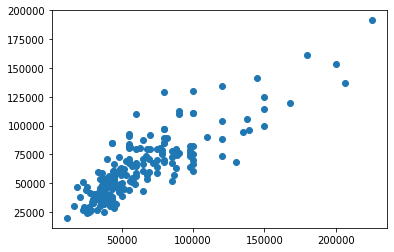

In [71]:
plt.scatter(y_test, predictions)

C:\Users\sanje_crlv28m\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


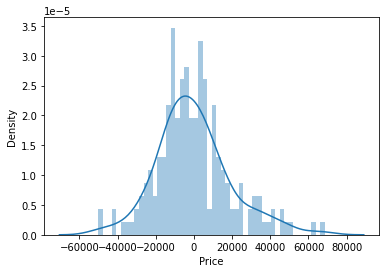

In [70]:
sns.distplot((y_test-predictions),bins = 50);

In [60]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

-3.060574613894941

Text(0, 0.5, 'y_pred')

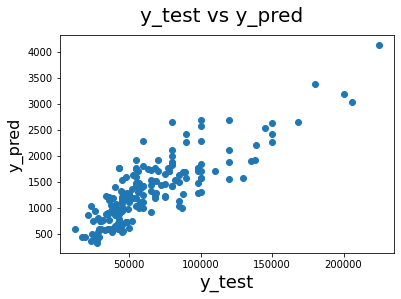

In [61]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)